In [ ]:
!pip install jupyter-dash
!pip install yfinance
!pip install talib-binary


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import pandas_datareader as pdr
import datetime as dt
from matplotlib.pyplot import cm
import yfinance as yf
import talib as ta

In [ ]:
app = JupyterDash(__name__)


# ------------------------------------------
app.layout = html.Div([
    html.H1("STOCK MARKET TEST", style={'text-align': 'center'}),

    dcc.Dropdown(id="slct_ticker",
                 options=[
                    {"label": "3M", "value": "MMM"}, 
                    {"label": "A. O. Smith", "value": "AOS"}, 
                    {"label": "Abbott", "value": "ABT"}, 
                    {"label": "AbbVie", "value": "ABBV"}, 
                    {"label": "Abiomed", "value": "ABMD"}, 
                    {"label": "Accenture", "value": "ACN"}, 
                    {"label": "Activision Blizzard", "value": "ATVI"}, 
                    {"label": "ADM", "value": "ADM"}, 
                    {"label": "Adobe", "value": "ADBE"}, 
                    {"label": "ADP", "value": "ADP"}, 
                    {"label": "Advance Auto Parts", "value": "AAP"}, 
                    {"label": "AES", "value": "AES"}, 
                    {"label": "Aflac", "value": "AFL"}, 
                    {"label": "Agilent Technologies", "value": "A"}, 
                    {"label": "AIG", "value": "AIG"}, 
                    {"label": "Air Products", "value": "APD"}, 
                    {"label": "Akamai", "value": "AKAM"}, 
                    {"label": "Alaska Air Group", "value": "ALK"}, 
                    {"label": "Albemarle", "value": "ALB"}, 
                    {"label": "Alexandria", "value": "ARE"}, 
                    {"label": "Align", "value": "ALGN"}, 
                    {"label": "Allegion", "value": "ALLE"}, 
                    {"label": "Alliant Energy", "value": "LNT"}, 
                    {"label": "Allstate", "value": "ALL"}, 
                    {"label": "Alphabet (Class A)", "value": "GOOGL"}, 
                    {"label": "Alphabet (Class C)", "value": "GOOG"}, 
                    {"label": "Altria", "value": "MO"}, 
                    {"label": "Amazon", "value": "AMZN"}, 
                    {"label": "Amcor", "value": "AMCR"}, 
                    {"label": "AMD", "value": "AMD"}, 
                    {"label": "Ameren", "value": "AEE"}, 
                    {"label": "American Airlines Group", "value": "AAL"}, 
                    {"label": "American Electric Power", "value": "AEP"}, 
                    {"label": "American Express", "value": "AXP"}, 
                    {"label": "American Tower", "value": "AMT"}, 
                    {"label": "American Water", "value": "AWK"}, 
                    {"label": "Ameriprise Financial", "value": "AMP"}, 
                    {"label": "AmerisourceBergen", "value": "ABC"}, 
                    {"label": "Ametek", "value": "AME"}, 
                    {"label": "Amgen", "value": "AMGN"}, 
                    {"label": "Amphenol", "value": "APH"}, 
                    {"label": "Analog Devices", "value": "ADI"}, 
                    {"label": "Ansys", "value": "ANSS"}, 
                    {"label": "Anthem", "value": "ANTM"}, 
                    {"label": "Aon", "value": "AON"}, 
                    {"label": "APA Corporation", "value": "APA"}, 
                    {"label": "Apple", "value": "AAPL"}, 
                    {"label": "Applied Materials", "value": "AMAT"}, 
                    {"label": "Aptiv", "value": "APTV"}, 
                    {"label": "Arista", "value": "ANET"}, 
                    {"label": "Assurant", "value": "AIZ"}, 
                    {"label": "AT&T", "value": "T"}, 
                    {"label": "Atmos Energy", "value": "ATO"}, 
                    {"label": "Autodesk", "value": "ADSK"}, 
                    {"label": "AutoZone", "value": "AZO"}, 
                    {"label": "AvalonBay Communities", "value": "AVB"}, 
                    {"label": "Avery Dennison", "value": "AVY"}, 
                    {"label": "Baker Hughes", "value": "BKR"}, 
                    {"label": "Ball", "value": "BLL"}, 
                    {"label": "Bank of America", "value": "BAC"}, 
                    {"label": "Bath & Body Works", "value": "BBWI"}, 
                    {"label": "Baxter", "value": "BAX"}, 
                    {"label": "Becton Dickinson", "value": "BDX"}, 
                    {"label": "Berkley", "value": "WRB"}, 
                    {"label": "Berkshire Hathaway", "value": "BRK.B"}, 
                    {"label": "Best Buy", "value": "BBY"}, 
                    {"label": "Bio-Rad", "value": "BIO"}, 
                    {"label": "Bio-Techne", "value": "TECH"}, 
                    {"label": "Biogen", "value": "BIIB"}, 
                    {"label": "BlackRock", "value": "BLK"}, 
                    {"label": "BNY Mellon", "value": "BK"}, 
                    {"label": "Boeing", "value": "BA"}, 
                    {"label": "Booking Holdings", "value": "BKNG"}, 
                    {"label": "BorgWarner", "value": "BWA"}, 
                    {"label": "Boston Properties", "value": "BXP"}, 
                    {"label": "Boston Scientific", "value": "BSX"}, 
                    {"label": "Bristol Myers Squibb", "value": "BMY"}, 
                    {"label": "Broadcom", "value": "AVGO"}, 
                    {"label": "Broadridge", "value": "BR"}, 
                    {"label": "Brown & Brown", "value": "BRO"}, 
                    {"label": "Brown–Forman", "value": "BF.B"}, 
                    {"label": "C.H. Robinson", "value": "CHRW"}, 
                    {"label": "Cadence", "value": "CDNS"}, 
                    {"label": "Caesars Entertainment", "value": "CZR"}, 
                    {"label": "Camden", "value": "CPT"}, 
                    {"label": "Campbell's", "value": "CPB"}, 
                    {"label": "Capital One", "value": "COF"}, 
                    {"label": "Cardinal Health", "value": "CAH"}, 
                    {"label": "CarMax", "value": "KMX"}, 
                    {"label": "Carnival", "value": "CCL"}, 
                    {"label": "Carrier", "value": "CARR"}, 
                    {"label": "Catalent", "value": "CTLT"}, 
                    {"label": "Caterpillar", "value": "CAT"}, 
                    {"label": "Cboe", "value": "CBOE"}, 
                    {"label": "CBRE", "value": "CBRE"}, 
                    {"label": "CDW", "value": "CDW"}, 
                    {"label": "Celanese", "value": "CE"}, 
                    {"label": "Centene", "value": "CNC"}, 
                    {"label": "CenterPoint Energy", "value": "CNP"}, 
                    {"label": "Ceridian", "value": "CDAY"}, 
                    {"label": "Cerner", "value": "CERN"}, 
                    {"label": "CF Industries", "value": "CF"}, 
                    {"label": "Charles River", "value": "CRL"}, 
                    {"label": "Charles Schwab", "value": "SCHW"}, 
                    {"label": "Charter Communications", "value": "CHTR"}, 
                    {"label": "Chevron", "value": "CVX"}, 
                    {"label": "Chipotle Mexican Grill", "value": "CMG"}, 
                    {"label": "Chubb", "value": "CB"}, 
                    {"label": "Church & Dwight", "value": "CHD"}, 
                    {"label": "Cigna", "value": "CI"}, 
                    {"label": "Cincinnati Financial", "value": "CINF"}, 
                    {"label": "Cintas", "value": "CTAS"}, 
                    {"label": "Cisco", "value": "CSCO"}, 
                    {"label": "Citigroup", "value": "C"}, 
                    {"label": "Citizens", "value": "CFG"}, 
                    {"label": "Citrix", "value": "CTXS"}, 
                    {"label": "Clorox", "value": "CLX"}, 
                    {"label": "CME Group", "value": "CME"}, 
                    {"label": "CMS Energy", "value": "CMS"}, 
                    {"label": "Coca-Cola", "value": "KO"}, 
                    {"label": "Cognizant", "value": "CTSH"}, 
                    {"label": "Colgate-Palmolive", "value": "CL"}, 
                    {"label": "Comcast", "value": "CMCSA"}, 
                    {"label": "Comerica", "value": "CMA"}, 
                    {"label": "Conagra Brands", "value": "CAG"}, 
                    {"label": "ConocoPhillips", "value": "COP"}, 
                    {"label": "Con Edison", "value": "ED"}, 
                    {"label": "Constellation Brands", "value": "STZ"}, 
                    {"label": "Constellation Energy", "value": "CEG"}, 
                    {"label": "CooperCompanies", "value": "COO"}, 
                    {"label": "Copart", "value": "CPRT"}, 
                    {"label": "Corning", "value": "GLW"}, 
                    {"label": "Corteva", "value": "CTVA"}, 
                    {"label": "Costco", "value": "COST"}, 
                    {"label": "Coterra", "value": "CTRA"}, 
                    {"label": "Crown Castle", "value": "CCI"}, 
                    {"label": "CSX", "value": "CSX"}, 
                    {"label": "Cummins", "value": "CMI"}, 
                    {"label": "CVS Health", "value": "CVS"}, 
                    {"label": "D.R. Horton", "value": "DHI"}, 
                    {"label": "Danaher", "value": "DHR"}, 
                    {"label": "Darden", "value": "DRI"}, 
                    {"label": "DaVita", "value": "DVA"}, 
                    {"label": "Deere & Co.", "value": "DE"}, 
                    {"label": "Delta Air Lines", "value": "DAL"}, 
                    {"label": "Dentsply Sirona", "value": "XRAY"}, 
                    {"label": "Devon", "value": "DVN"}, 
                    {"label": "DexCom", "value": "DXCM"}, 
                    {"label": "Diamondback", "value": "FANG"}, 
                    {"label": "Digital Realty", "value": "DLR"}, 
                    {"label": "Discover", "value": "DFS"}, 
                    {"label": "Dish", "value": "DISH"}, 
                    {"label": "Disney", "value": "DIS"}, 
                    {"label": "Dollar General", "value": "DG"}, 
                    {"label": "Dollar Tree", "value": "DLTR"}, 
                    {"label": "Dominion Energy", "value": "D"}, 
                    {"label": "Domino's", "value": "DPZ"}, 
                    {"label": "Dover", "value": "DOV"}, 
                    {"label": "Dow", "value": "DOW"}, 
                    {"label": "DTE", "value": "DTE"}, 
                    {"label": "Duke Energy", "value": "DUK"}, 
                    {"label": "Duke Realty", "value": "DRE"}, 
                    {"label": "DuPont", "value": "DD"}, 
                    {"label": "DXC Technology", "value": "DXC"}, 
                    {"label": "Eastman", "value": "EMN"}, 
                    {"label": "Eaton", "value": "ETN"}, 
                    {"label": "eBay", "value": "EBAY"}, 
                    {"label": "Ecolab", "value": "ECL"}, 
                    {"label": "Edison International", "value": "EIX"}, 
                    {"label": "Edwards Lifesciences", "value": "EW"}, 
                    {"label": "Electronic Arts", "value": "EA"}, 
                    {"label": "Emerson", "value": "EMR"}, 
                    {"label": "Enphase", "value": "ENPH"}, 
                    {"label": "Entergy", "value": "ETR"}, 
                    {"label": "EOG Resources", "value": "EOG"}, 
                    {"label": "EPAM", "value": "EPAM"}, 
                    {"label": "Equifax", "value": "EFX"}, 
                    {"label": "Equinix", "value": "EQIX"}, 
                    {"label": "Equity Residential", "value": "EQR"}, 
                    {"label": "Essex", "value": "ESS"}, 
                    {"label": "Estée Lauder Companies", "value": "EL"}, 
                    {"label": "Etsy", "value": "ETSY"}, 
                    {"label": "Everest", "value": "RE"}, 
                    {"label": "Evergy", "value": "EVRG"}, 
                    {"label": "Eversource", "value": "ES"}, 
                    {"label": "Exelon", "value": "EXC"}, 
                    {"label": "Expedia Group", "value": "EXPE"}, 
                    {"label": "Expeditors", "value": "EXPD"}, 
                    {"label": "Extra Space Storage", "value": "EXR"}, 
                    {"label": "ExxonMobil", "value": "XOM"}, 
                    {"label": "F5", "value": "FFIV"}, 
                    {"label": "FactSet", "value": "FDS"}, 
                    {"label": "Fastenal", "value": "FAST"}, 
                    {"label": "Federal Realty", "value": "FRT"}, 
                    {"label": "FedEx", "value": "FDX"}, 
                    {"label": "Fifth Third Bank", "value": "FITB"}, 
                    {"label": "First Republic", "value": "FRC"}, 
                    {"label": "FirstEnergy", "value": "FE"}, 
                    {"label": "FIS", "value": "FIS"}, 
                    {"label": "Fiserv", "value": "FISV"}, 
                    {"label": "Fleetcor", "value": "FLT"}, 
                    {"label": "FMC", "value": "FMC"}, 
                    {"label": "Ford", "value": "F"}, 
                    {"label": "Fortinet", "value": "FTNT"}, 
                    {"label": "Fortive", "value": "FTV"}, 
                    {"label": "Fortune Brands", "value": "FBHS"}, 
                    {"label": "Fox Corporation (Class A)", "value": "FOXA"}, 
                    {"label": "Fox Corporation (Class B)", "value": "FOX"}, 
                    {"label": "Franklin Templeton", "value": "BEN"}, 
                    {"label": "Freeport-McMoRan", "value": "FCX"}, 
                    {"label": "Gallagher", "value": "AJG"}, 
                    {"label": "Garmin", "value": "GRMN"}, 
                    {"label": "Gartner", "value": "IT"}, 
                    {"label": "GE", "value": "GE"}, 
                    {"label": "Generac", "value": "GNRC"}, 
                    {"label": "General Dynamics", "value": "GD"}, 
                    {"label": "General Mills", "value": "GIS"}, 
                    {"label": "Genuine Parts", "value": "GPC"}, 
                    {"label": "Gilead", "value": "GILD"}, 
                    {"label": "Globe Life", "value": "GL"}, 
                    {"label": "Global Payments", "value": "GPN"}, 
                    {"label": "GM", "value": "GM"}, 
                    {"label": "Goldman Sachs", "value": "GS"}, 
                    {"label": "Grainger", "value": "GWW"}, 
                    {"label": "Halliburton", "value": "HAL"}, 
                    {"label": "Hartford (The)", "value": "HIG"}, 
                    {"label": "Hasbro", "value": "HAS"}, 
                    {"label": "HCA Healthcare", "value": "HCA"}, 
                    {"label": "Healthpeak", "value": "PEAK"}, 
                    {"label": "Henry Schein", "value": "HSIC"}, 
                    {"label": "Hershey's", "value": "HSY"}, 
                    {"label": "Hess", "value": "HES"}, 
                    {"label": "Hewlett Packard Enterprise", "value": "HPE"}, 
                    {"label": "Hilton", "value": "HLT"}, 
                    {"label": "Hologic", "value": "HOLX"}, 
                    {"label": "Home Depot", "value": "HD"}, 
                    {"label": "Honeywell", "value": "HON"}, 
                    {"label": "Hormel", "value": "HRL"}, 
                    {"label": "Host Hotels & Resorts", "value": "HST"}, 
                    {"label": "Howmet Aerospace", "value": "HWM"}, 
                    {"label": "HP", "value": "HPQ"}, 
                    {"label": "Humana", "value": "HUM"}, 
                    {"label": "Huntington Ingalls Industries", "value": "HII"}, 
                    {"label": "Huntington National Bank", "value": "HBAN"}, 
                    {"label": "IDEX", "value": "IEX"}, 
                    {"label": "Idexx Laboratories", "value": "IDXX"}, 
                    {"label": "Illinois Tool Works", "value": "ITW"}, 
                    {"label": "Illumina", "value": "ILMN"}, 
                    {"label": "Incyte", "value": "INCY"}, 
                    {"label": "Ingersoll Rand", "value": "IR"}, 
                    {"label": "Intel", "value": "INTC"}, 
                    {"label": "Intercontinental Exchange", "value": "ICE"}, 
                    {"label": "IBM", "value": "IBM"}, 
                    {"label": "International Paper", "value": "IP"}, 
                    {"label": "Interpublic Group", "value": "IPG"}, 
                    {"label": "International Flavors & Fragrances", "value": "IFF"}, 
                    {"label": "Intuit", "value": "INTU"}, 
                    {"label": "Intuitive Surgical", "value": "ISRG"}, 
                    {"label": "Invesco", "value": "IVZ"}, 
                    {"label": "IPG Photonics", "value": "IPGP"}, 
                    {"label": "IQVIA", "value": "IQV"}, 
                    {"label": "Iron Mountain", "value": "IRM"}, 
                    {"label": "J.B. Hunt", "value": "JBHT"}, 
                    {"label": "Jack Henry & Associates", "value": "JKHY"}, 
                    {"label": "Jacobs", "value": "J"}, 
                    {"label": "Johnson & Johnson", "value": "JNJ"}, 
                    {"label": "Johnson Controls", "value": "JCI"}, 
                    {"label": "JPMorgan Chase", "value": "JPM"}, 
                    {"label": "Juniper Networks", "value": "JNPR"}, 
                    {"label": "Kellogg's", "value": "K"}, 
                    {"label": "KeyCorp", "value": "KEY"}, 
                    {"label": "Keysight", "value": "KEYS"}, 
                    {"label": "Kimberly-Clark", "value": "KMB"}, 
                    {"label": "Kimco Realty", "value": "KIM"}, 
                    {"label": "Kinder Morgan", "value": "KMI"}, 
                    {"label": "KLA", "value": "KLAC"}, 
                    {"label": "Kraft Heinz", "value": "KHC"}, 
                    {"label": "Kroger", "value": "KR"}, 
                    {"label": "L3Harris", "value": "LHX"}, 
                    {"label": "LabCorp", "value": "LH"}, 
                    {"label": "Lam Research", "value": "LRCX"}, 
                    {"label": "Lamb Weston", "value": "LW"}, 
                    {"label": "Las Vegas Sands", "value": "LVS"}, 
                    {"label": "Leidos", "value": "LDOS"}, 
                    {"label": "Lennar", "value": "LEN"}, 
                    {"label": "Lilly", "value": "LLY"}, 
                    {"label": "Lincoln Financial", "value": "LNC"}, 
                    {"label": "Linde", "value": "LIN"}, 
                    {"label": "Live Nation Entertainment", "value": "LYV"}, 
                    {"label": "LKQ Corporation", "value": "LKQ"}, 
                    {"label": "Lockheed Martin", "value": "LMT"}, 
                    {"label": "Loews Corporation", "value": "L"}, 
                    {"label": "Lowe's", "value": "LOW"}, 
                    {"label": "Lumen", "value": "LUMN"}, 
                    {"label": "LyondellBasell", "value": "LYB"}, 
                    {"label": "M&T Bank", "value": "MTB"}, 
                    {"label": "Marathon Oil", "value": "MRO"}, 
                    {"label": "Marathon Petroleum", "value": "MPC"}, 
                    {"label": "MarketAxess", "value": "MKTX"}, 
                    {"label": "Marriott International", "value": "MAR"}, 
                    {"label": "Marsh & McLennan", "value": "MMC"}, 
                    {"label": "Martin Marietta", "value": "MLM"}, 
                    {"label": "Masco", "value": "MAS"}, 
                    {"label": "Mastercard", "value": "MA"}, 
                    {"label": "Match Group", "value": "MTCH"}, 
                    {"label": "McCormick", "value": "MKC"}, 
                    {"label": "McDonald's", "value": "MCD"}, 
                    {"label": "McKesson", "value": "MCK"}, 
                    {"label": "Medtronic", "value": "MDT"}, 
                    {"label": "Merck", "value": "MRK"}, 
                    {"label": "Meta", "value": "FB"}, 
                    {"label": "MetLife", "value": "MET"}, 
                    {"label": "Mettler Toledo", "value": "MTD"}, 
                    {"label": "MGM Resorts", "value": "MGM"}, 
                    {"label": "Microchip", "value": "MCHP"}, 
                    {"label": "Micron", "value": "MU"}, 
                    {"label": "Microsoft", "value": "MSFT"}, 
                    {"label": "Mid-America Apartments", "value": "MAA"}, 
                    {"label": "Moderna", "value": "MRNA"}, 
                    {"label": "Mohawk Industries", "value": "MHK"}, 
                    {"label": "Molina Healthcare", "value": "MOH"}, 
                    {"label": "Molson Coors", "value": "TAP"}, 
                    {"label": "Mondelez International", "value": "MDLZ"}, 
                    {"label": "Monolithic Power Systems", "value": "MPWR"}, 
                    {"label": "Monster Beverage", "value": "MNST"}, 
                    {"label": "Moody's", "value": "MCO"}, 
                    {"label": "Morgan Stanley", "value": "MS"}, 
                    {"label": "Mosaic", "value": "MOS"}, 
                    {"label": "Motorola Solutions", "value": "MSI"}, 
                    {"label": "MSCI", "value": "MSCI"}, 
                    {"label": "Nasdaq", "value": "NDAQ"}, 
                    {"label": "NetApp", "value": "NTAP"}, 
                    {"label": "Netflix", "value": "NFLX"}, 
                    {"label": "Newell Brands", "value": "NWL"}, 
                    {"label": "Newmont", "value": "NEM"}, 
                    {"label": "News Corp (Class A)", "value": "NWSA"}, 
                    {"label": "News Corp (Class B)", "value": "NWS"}, 
                    {"label": "NextEra Energy", "value": "NEE"}, 
                    {"label": "Nielsen", "value": "NLSN"}, 
                    {"label": "Nike", "value": "NKE"}, 
                    {"label": "NiSource", "value": "NI"}, 
                    {"label": "Nordson", "value": "NDSN"}, 
                    {"label": "Norfolk Southern", "value": "NSC"}, 
                    {"label": "Northern Trust", "value": "NTRS"}, 
                    {"label": "Northrop Grumman", "value": "NOC"}, 
                    {"label": "NortonLifeLock", "value": "NLOK"}, 
                    {"label": "Norwegian Cruise Line Holdings", "value": "NCLH"}, 
                    {"label": "NRG Energy", "value": "NRG"}, 
                    {"label": "Nucor", "value": "NUE"}, 
                    {"label": "Nvidia", "value": "NVDA"}, 
                    {"label": "NVR", "value": "NVR"}, 
                    {"label": "NXP", "value": "NXPI"}, 
                    {"label": "O'Reilly Automotive", "value": "ORLY"}, 
                    {"label": "Occidental Petroleum", "value": "OXY"}, 
                    {"label": "Old Dominion", "value": "ODFL"}, 
                    {"label": "Omnicom Group", "value": "OMC"}, 
                    {"label": "Oneok", "value": "OKE"}, 
                    {"label": "Oracle", "value": "ORCL"}, 
                    {"label": "Organon", "value": "OGN"}, 
                    {"label": "Otis", "value": "OTIS"}, 
                    {"label": "Paccar", "value": "PCAR"}, 
                    {"label": "Packaging Corporation of America", "value": "PKG"}, 
                    {"label": "Paramount", "value": "PARA"}, 
                    {"label": "Parker", "value": "PH"}, 
                    {"label": "Paychex", "value": "PAYX"}, 
                    {"label": "Paycom", "value": "PAYC"}, 
                    {"label": "PayPal", "value": "PYPL"}, 
                    {"label": "Penn National Gaming", "value": "PENN"}, 
                    {"label": "Pentair", "value": "PNR"}, 
                    {"label": "PepsiCo", "value": "PEP"}, 
                    {"label": "PerkinElmer", "value": "PKI"}, 
                    {"label": "Pfizer", "value": "PFE"}, 
                    {"label": "Philip Morris International", "value": "PM"}, 
                    {"label": "Phillips 66", "value": "PSX"}, 
                    {"label": "Pinnacle West", "value": "PNW"}, 
                    {"label": "Pioneer Natural Resources", "value": "PXD"}, 
                    {"label": "PNC Financial Services", "value": "PNC"}, 
                    {"label": "Pool Corporation", "value": "POOL"}, 
                    {"label": "PPG Industries", "value": "PPG"}, 
                    {"label": "PPL", "value": "PPL"}, 
                    {"label": "Principal", "value": "PFG"}, 
                    {"label": "Procter & Gamble", "value": "PG"}, 
                    {"label": "Progressive", "value": "PGR"}, 
                    {"label": "Prologis", "value": "PLD"}, 
                    {"label": "Prudential", "value": "PRU"}, 
                    {"label": "PSEG", "value": "PEG"}, 
                    {"label": "PTC", "value": "PTC"}, 
                    {"label": "Public Storage", "value": "PSA"}, 
                    {"label": "PulteGroup", "value": "PHM"}, 
                    {"label": "PVH", "value": "PVH"}, 
                    {"label": "Qorvo", "value": "QRVO"}, 
                    {"label": "Quanta", "value": "PWR"}, 
                    {"label": "Qualcomm", "value": "QCOM"}, 
                    {"label": "Quest Diagnostics", "value": "DGX"}, 
                    {"label": "Ralph Lauren", "value": "RL"}, 
                    {"label": "Raymond James", "value": "RJF"}, 
                    {"label": "Raytheon Technologies", "value": "RTX"}, 
                    {"label": "Realty Income", "value": "O"}, 
                    {"label": "Regency Centers", "value": "REG"}, 
                    {"label": "Regeneron", "value": "REGN"}, 
                    {"label": "Regions", "value": "RF"}, 
                    {"label": "Republic Services", "value": "RSG"}, 
                    {"label": "ResMed", "value": "RMD"}, 
                    {"label": "Robert Half", "value": "RHI"}, 
                    {"label": "Rockwell Automation", "value": "ROK"}, 
                    {"label": "Rollins", "value": "ROL"}, 
                    {"label": "Roper", "value": "ROP"}, 
                    {"label": "Ross", "value": "ROST"}, 
                    {"label": "Royal Caribbean Group", "value": "RCL"}, 
                    {"label": "S&P Global", "value": "SPGI"}, 
                    {"label": "Salesforce", "value": "CRM"}, 
                    {"label": "SBA Communications", "value": "SBAC"}, 
                    {"label": "Schlumberger", "value": "SLB"}, 
                    {"label": "Seagate", "value": "STX"}, 
                    {"label": "Sealed Air", "value": "SEE"}, 
                    {"label": "Sempra Energy", "value": "SRE"}, 
                    {"label": "ServiceNow", "value": "NOW"}, 
                    {"label": "Sherwin-Williams", "value": "SHW"}, 
                    {"label": "Signature Bank", "value": "SBNY"}, 
                    {"label": "Simon", "value": "SPG"}, 
                    {"label": "Skyworks", "value": "SWKS"}, 
                    {"label": "Smucker", "value": "SJM"}, 
                    {"label": "Snap-on", "value": "SNA"}, 
                    {"label": "SolarEdge", "value": "SEDG"}, 
                    {"label": "Southern Company", "value": "SO"}, 
                    {"label": "Southwest Airlines", "value": "LUV"}, 
                    {"label": "Stanley Black & Decker", "value": "SWK"}, 
                    {"label": "Starbucks", "value": "SBUX"}, 
                    {"label": "State Street", "value": "STT"}, 
                    {"label": "Steris", "value": "STE"}, 
                    {"label": "Stryker", "value": "SYK"}, 
                    {"label": "SVB Financial", "value": "SIVB"}, 
                    {"label": "Synchrony", "value": "SYF"}, 
                    {"label": "Synopsys", "value": "SNPS"}, 
                    {"label": "Sysco", "value": "SYY"}, 
                    {"label": "T-Mobile", "value": "TMUS"}, 
                    {"label": "T. Rowe Price", "value": "TROW"}, 
                    {"label": "Take-Two Interactive", "value": "TTWO"}, 
                    {"label": "Tapestry", "value": "TPR"}, 
                    {"label": "Target", "value": "TGT"}, 
                    {"label": "TE Connectivity", "value": "TEL"}, 
                    {"label": "Teledyne", "value": "TDY"}, 
                    {"label": "Teleflex", "value": "TFX"}, 
                    {"label": "Teradyne", "value": "TER"}, 
                    {"label": "Tesla", "value": "TSLA"}, 
                    {"label": "Texas Instruments", "value": "TXN"}, 
                    {"label": "Textron", "value": "TXT"}, 
                    {"label": "Thermo Fisher Scientific", "value": "TMO"}, 
                    {"label": "TJX Companies", "value": "TJX"}, 
                    {"label": "Tractor Supply", "value": "TSCO"}, 
                    {"label": "Trane Technologies", "value": "TT"}, 
                    {"label": "TransDigm", "value": "TDG"}, 
                    {"label": "Travelers", "value": "TRV"}, 
                    {"label": "Trimble", "value": "TRMB"}, 
                    {"label": "Truist", "value": "TFC"}, 
                    {"label": "Twitter", "value": "TWTR"}, 
                    {"label": "Tyler Technologies", "value": "TYL"}, 
                    {"label": "Tyson", "value": "TSN"}, 
                    {"label": "U.S. Bank", "value": "USB"}, 
                    {"label": "UDR", "value": "UDR"}, 
                    {"label": "Ulta Beauty", "value": "ULTA"}, 
                    {"label": "Under Armour (Class A)", "value": "UAA"}, 
                    {"label": "Under Armour (Class C)", "value": "UA"}, 
                    {"label": "Union Pacific", "value": "UNP"}, 
                    {"label": "United Airlines", "value": "UAL"}, 
                    {"label": "UnitedHealth Group", "value": "UNH"}, 
                    {"label": "United Parcel Service", "value": "UPS"}, 
                    {"label": "United Rentals", "value": "URI"}, 
                    {"label": "Universal Health Services", "value": "UHS"}, 
                    {"label": "Valero", "value": "VLO"}, 
                    {"label": "Ventas", "value": "VTR"}, 
                    {"label": "Verisign", "value": "VRSN"}, 
                    {"label": "Verisk", "value": "VRSK"}, 
                    {"label": "Verizon", "value": "VZ"}, 
                    {"label": "Vertex", "value": "VRTX"}, 
                    {"label": "VF Corporation", "value": "VFC"}, 
                    {"label": "Viatris", "value": "VTRS"}, 
                    {"label": "Visa", "value": "V"}, 
                    {"label": "Vornado Realty Trust", "value": "VNO"}, 
                    {"label": "Vulcan Materials", "value": "VMC"}, 
                    {"label": "Wabtec", "value": "WAB"}, 
                    {"label": "Walmart", "value": "WMT"}, 
                    {"label": "Walgreens Boots Alliance", "value": "WBA"}, 
                    {"label": "Warner Bros. Discovery", "value": "WBD"}, 
                    {"label": "Waste Management", "value": "WM"}, 
                    {"label": "Waters", "value": "WAT"}, 
                    {"label": "WEC Energy Group", "value": "WEC"}, 
                    {"label": "Wells Fargo", "value": "WFC"}, 
                    {"label": "Welltower", "value": "WELL"}, 
                    {"label": "West Pharmaceutical Services", "value": "WST"}, 
                    {"label": "Western Digital", "value": "WDC"}, 
                    {"label": "WestRock", "value": "WRK"}, 
                    {"label": "Weyerhaeuser", "value": "WY"}, 
                    {"label": "Whirlpool", "value": "WHR"}, 
                    {"label": "Williams", "value": "WMB"}, 
                    {"label": "Willis Towers Watson", "value": "WTW"}, 
                    {"label": "Wynn Resorts", "value": "WYNN"}, 
                    {"label": "Xcel Energy", "value": "XEL"}, 
                    {"label": "Xylem", "value": "XYL"}, 
                    {"label": "Yum! Brands", "value": "YUM"}, 
                    {"label": "Zebra", "value": "ZBRA"}, 
                    {"label": "Zimmer Biomet", "value": "ZBH"}, 
                    {"label": "Zions Bancorp", "value": "ZION"}, 
                    {"label": "Zoetis", "value": "ZTS"}],
                 multi=False,
                 value="AAPL",
                 style={'width': "40%"}
                 ),
    html.Br(),

    dcc.DatePickerSingle(
            id='my-date-picker-single',
            min_date_allowed=dt.date(2017, 1, 1),
            max_date_allowed=dt.date(2022, 3, 1),
            initial_visible_month=dt.date(2017, 8, 5),
            date=dt.date(2017, 8, 25)
        ),

    html.Br(),

    dcc.DatePickerSingle(
                id='my-date-picker-single2',
                min_date_allowed=dt.date(2017, 1, 1),
                max_date_allowed=dt.date(2022, 3, 1),
                initial_visible_month=dt.date(2021, 8, 5),
                date=dt.date(2021, 8, 25)
            ),

    html.Br(),


    dcc.Graph(id='candlePlot', figure={}),
    html.Br(), 

    dcc.Dropdown(id="slct_Indicator",
                 options=[
                     {"label": "RSI", "value": "RSI"},
                     {"label": "MACD", "value": "MACD"},
                     {"label": "Stochastic", "value": "STOCH"},
                     {"label": "Momentum", "value": "MOM"}],
                 multi=False,
                 value="RSI",
                 style={'width': "40%"}
                 ),

    dcc.Graph(id="IndicatorPlt", figure={}), 
    #html.Br(), 

    #dcc.Graph(id='scatter', figure={})

])


# ---------------------------------
@app.callback(
    [Output(component_id='candlePlot', component_property='figure'), 
     Output(component_id='IndicatorPlt', component_property='figure')],
    [Input(component_id='slct_ticker', component_property='value'),
     Input('my-date-picker-single', 'date'),
     Input('my-date-picker-single2', 'date'), 
     Input(component_id='slct_Indicator', component_property='value')]

)
def update(ticker_slctd, start_date, end_date, indicator_slctd):
    stock = yf.Ticker(ticker_slctd)
    df = stock.history(start=start_date, end=end_date, ticker=ticker_slctd, interval='1d')
    dates = list(df.index)
    data = stock.info
    df['RSI'] = ta.RSI(df['Close'], timeperiod=14)
    df['MOM'] = ta.MOM(df['Close'], timeperiod=10)
    # df['MACD'], df['MACDSignal'], df['MACDHist'] = ta.MACD(df['Close'], fastperiod=12, fastmatype=0, slowperiod=26, slowmatype=0, signalperiod=9, signalmatype=0)
    # df['SlowK'], df['SlowD']= ta.STOCH(df['High'], df['Low'], df['Close'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    RSI_plt = px.line(x=dates, y=df['RSI'])
    fig = go.Figure(data=[go.Candlestick(x=dates,
                                         open=df['Open'],
                                         high=df['High'],
                                         low=df['Low'],
                                         close=df['Close'])])
    grossMargins = data['grossMargins']
    grossProfits = data['grossProfits']
    operatingCashFlow = data['operatingCashFlow']
    # fig2 = go.Figure(data=[go.Scatter(
    #     x=grossProfits, y=operatingCashFlow,
    #     mode='markers',
    #     marker_size=grossMargins)])

    return [go.Figure(data=fig), RSI_plt]

In [ ]:
app.run_server(mode='external')

Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
stock = yf.Ticker("AAPL")
df = stock.history(start=dt.date(2017, 1, 1), end=dt.date(2021, 12, 31), ticker="AAPL", interval='1d')
dates = list(df.index)

tcdl2 = ta.CDLSPINNINGTOP(df['Open'], df['High'], df['Low'], df['Close'])
tcdl = ta.CDLTAKURI(df['Open'], df['High'], df['Low'], df['Close'])

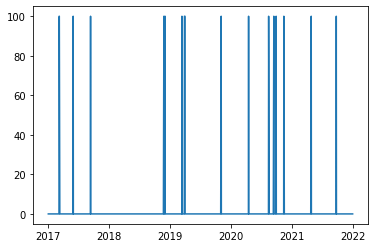

In [ ]:
plt.plot(dates, tcdl)

In [ ]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df = first_table

In [ ]:
df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...
499,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
502,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [ ]:
symbols = df['Symbol'].values.tolist()
security = df['Security'].values.tolist()

In [ ]:
companies = []
for i in range(len(symbols)): 
  company = '{"label": "' + security[i] + '", "value": "' + symbols[i] + '"}, ' 
  {"label": "Apple", "value": "AAPL"}
  companies.append(company)
  print(company)

In [ ]:
companies = []
for symbol in symbols:
  companies.append(symbol)

In [ ]:
data = []
for company in companies:
  stock = yf.Ticker(company)
  data.append(stock.info)
  print("Finished: " + company)

Finished: MMM
Finished: AOS


KeyboardInterrupt: ignored

In [ ]:
Amzn = yf.Ticker("AMZN")

In [ ]:
Amzn.info

{'52WeekChange': -0.11104703,
 'SandP52WeekChange': 0.06541932,
 'address1': '410 Terry Avenue North',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 3074.92,
 'askSize': 1100,
 'averageDailyVolume10Day': 2940130,
 'averageVolume': 3894045,
 'averageVolume10days': 2940130,
 'beta': 1.119607,
 'beta3Year': None,
 'bid': 3071.4,
 'bidSize': 900,
 'bookValue': 271.601,
 'category': None,
 'circulatingSupply': None,
 'city': 'Seattle',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 3090.9,
 'currentRatio': 1.136,
 'dateShortInterest': 1647302400,
 'dayHigh': 3101.98,
 'dayLow': 3038.01,
 'debtToEquity': 100.864,
 'dividendRate': None,
 'dividendYield': None,
 'earningsGrowth': 0.975,
 'earningsQuarterlyGrowth': 0.983,
 'ebitda': 59174998016,
 'ebitdaMargins': 0.12595001,
 'enterpriseToEbitda': 26.723,
 'enterpriseToRevenue': 3.366,
 'enterpriseValue': 1581341736960,
 'exDividendDate': None,
 'exchan